In [1]:
import networkx as nx

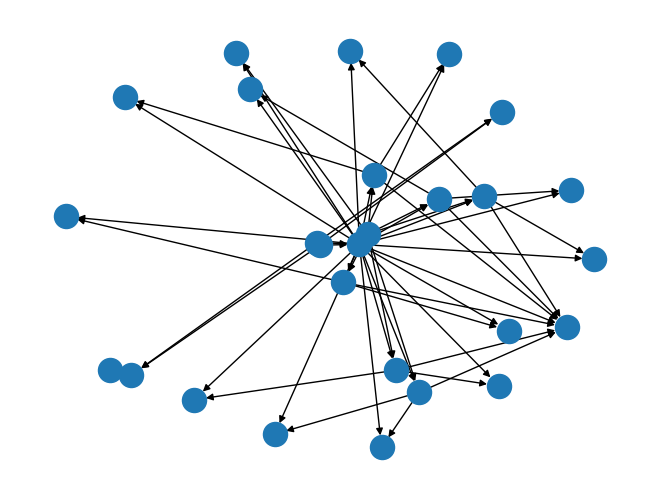

In [2]:
g = nx.read_gexf("graph.gexf")
nx.draw(g)

In [3]:
# node_label hinzufügen
for node in g.nodes(data=True):
    node[1]["node_label"] = node[1]["surname"] + " " + node[1]["birth_year"]

#nx.write_gexf(g, "./graph_relabeled.gexf", encoding="utf-8")

In [6]:
for edge in g.edges(data=True):
    relation_type = edge[2]["relation_type"]
    if relation_type == "FATHER_CHILD" or relation_type == "MOTHER_CHILD":
        edge[2]["weight"] = 1
    else:
        edge[2]["weight"] = 0

    print(edge)


('23fd4a98-a063-48b3-a2c6-d5eacade5af9', '0b56afab-50b9-45f6-af67-60b6bb8a555f', {'relation_type': 'HUSBAND_WIFE', 'id': '0', 'weight': 0})
('23fd4a98-a063-48b3-a2c6-d5eacade5af9', '98a248a1-5191-4003-87a9-da3415e9367d', {'relation_type': 'FATHER_CHILD', 'id': '1', 'weight': 1})
('23fd4a98-a063-48b3-a2c6-d5eacade5af9', '87797615-94e3-4b11-ab1d-5ea4c1552806', {'relation_type': 'FATHER_CHILD', 'id': '2', 'weight': 1})
('23fd4a98-a063-48b3-a2c6-d5eacade5af9', '67eba151-a4bb-497c-b70c-6553db7466d3', {'relation_type': 'FATHER_CHILD', 'id': '3', 'weight': 1})
('0b56afab-50b9-45f6-af67-60b6bb8a555f', '98a248a1-5191-4003-87a9-da3415e9367d', {'relation_type': 'MOTHER_CHILD', 'id': '4', 'weight': 1})
('0b56afab-50b9-45f6-af67-60b6bb8a555f', '87797615-94e3-4b11-ab1d-5ea4c1552806', {'relation_type': 'MOTHER_CHILD', 'id': '5', 'weight': 1})
('0b56afab-50b9-45f6-af67-60b6bb8a555f', '67eba151-a4bb-497c-b70c-6553db7466d3', {'relation_type': 'MOTHER_CHILD', 'id': '6', 'weight': 1})
('98a248a1-5191-4003

In [20]:
attritubes = {}
for i in nx.all_pairs_dijkstra_path_length(g):
    print(i[1])
    x = 0
    for k in i[1].keys():
        if i[1][k] != 0:
            x += 1
    print(i[0], x)
    attritubes[i[0]] = {"node_weight" : x}

nx.set_node_attributes(g, attritubes)
nx.write_gexf(g, "./graph_relabeled_weighted.gexf", encoding="utf-8")

{'23fd4a98-a063-48b3-a2c6-d5eacade5af9': 0, '0b56afab-50b9-45f6-af67-60b6bb8a555f': 0, '98a248a1-5191-4003-87a9-da3415e9367d': 1, '87797615-94e3-4b11-ab1d-5ea4c1552806': 1, '67eba151-a4bb-497c-b70c-6553db7466d3': 1, '50a4a66b-2f86-48d9-a862-efdd5fd62458': 1, 'e26f3a51-422b-4456-bf5a-e799a9b5fabd': 1, '469a05e1-5f98-42f8-ad0a-0fa101da19e8': 1, '9ed7678a-caf2-48a0-97cc-28388d6d2ecb': 1, '4716ee49-633e-46c5-9e00-944a57543c55': 1, '1a788c02-ea6e-466c-ae87-ce953203876f': 1, 'a79cf677-6adc-4829-a972-283fd4af63f6': 1, '473f1ce3-a3cc-4968-a2d1-19ed3f081048': 2, '4662b808-0594-4e85-9d7a-fad1cb993ab1': 2, '3075f7ec-3811-4370-a87a-6852aba0deaa': 2, 'ad5cb31b-e28e-4e26-90aa-1d588b8a9e14': 2, 'ffaece2e-ece3-4870-8e0f-c78e64bb41c4': 2, 'cf095ee0-4adf-482f-bff9-20b26b1bc018': 2, 'b517abf1-1659-4349-a14d-d8cde872453f': 2, '2b5668cb-83e8-4fa7-a207-6431df5bf0b8': 2, '99cff6fb-8b32-44f7-bb2b-0500c56b33f1': 2, '7e23d677-980d-4678-817c-87c3a63a66b8': 2, '9268f8a6-81e5-42ce-94ff-d8ef4da85352': 2, '019b5320-